# Validation and Testing

## Underfitting and Overfitting 

When data is used for forecasting there is a danger that the machine learning model will work very well for data, but will not generalize well to other data. An obvious point is that it is important that the data used in a machine learning model be representative of the situations to which the model is to be applied. It is also important to test a model out-of-sample, by this we mean that the model should be tested on data that is different from the sample data used to determine the parameters of the model.

Data scientist refer to the sample data as the **training set** and the data used to determine the accuracy of the model as the **test set**, often a **validation set** is used as well as we explain later;

In [1]:
path = './data/'

In [4]:
# Load the Pandas libraries with alias 'pd' 
import pandas as pd 
# Read data from file 'salary_vs_age_1.csv' 
# (in the same directory that your python process is based)
# Control delimiters, with read_table 
df1_train = pd.read_table(path + "salary_vs_age_1.csv", sep=";") 
df2_test = pd.read_table(path + "salary_vs_age_2.csv", sep=";") 
# Preview the first 5 lines of the loaded data 
df1_train.head()

,Age,Salary
0,25,135000
1,27,105000
2,30,105000
3,35,220000
4,40,300000


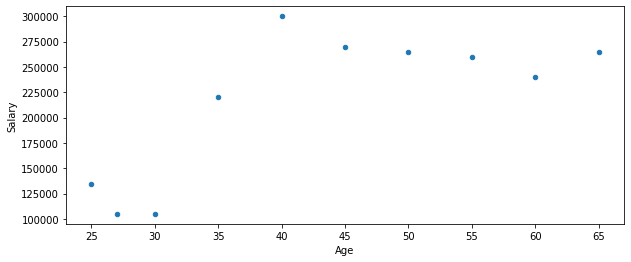

In [5]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 4]
df1_train.plot(x ='Age', y='Salary', kind = 'scatter')
plt.show()

In [1]:
#x1.max()

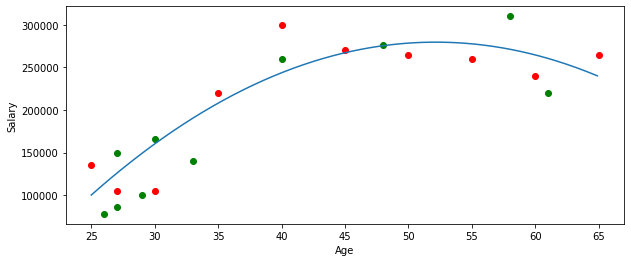

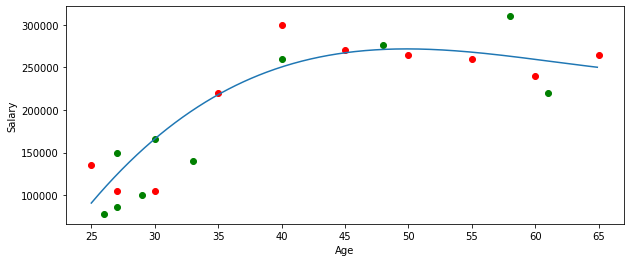

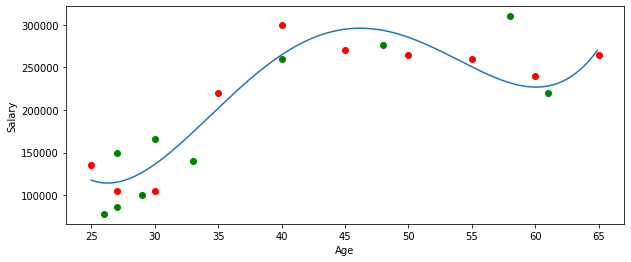

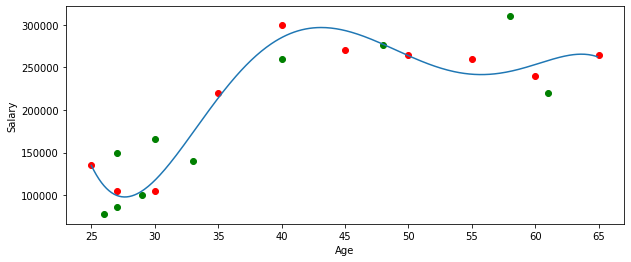

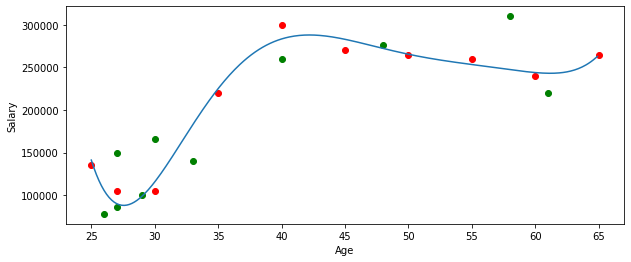

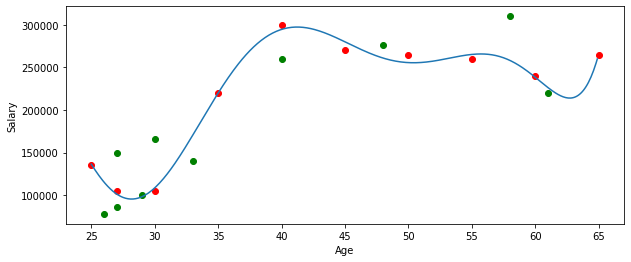

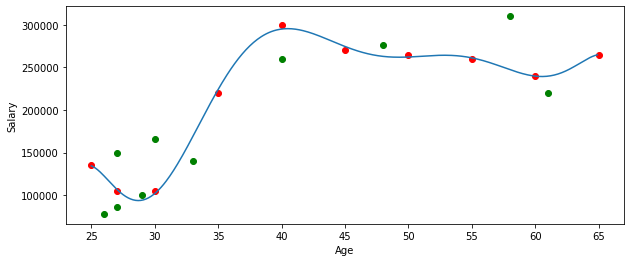

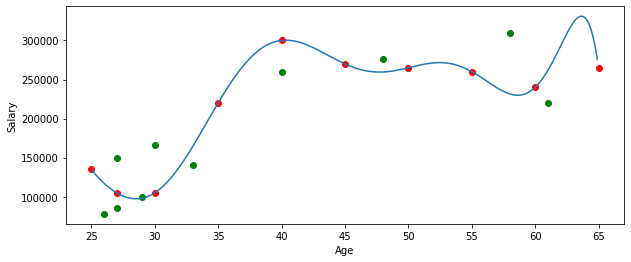

c:\users\lei00068\appdata\local\programs\python\python38\lib\site-packages\IPython\core\interactiveshell.py:3361: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


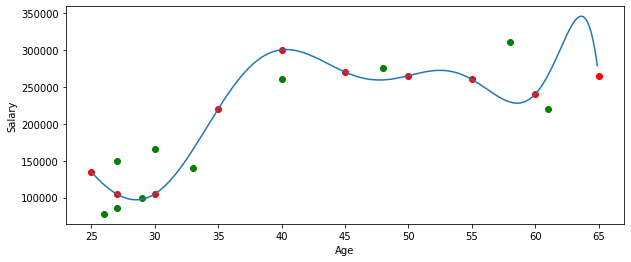

c:\users\lei00068\appdata\local\programs\python\python38\lib\site-packages\IPython\core\interactiveshell.py:3361: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


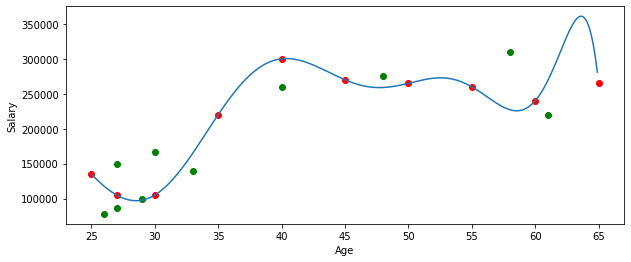

c:\users\lei00068\appdata\local\programs\python\python38\lib\site-packages\IPython\core\interactiveshell.py:3361: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


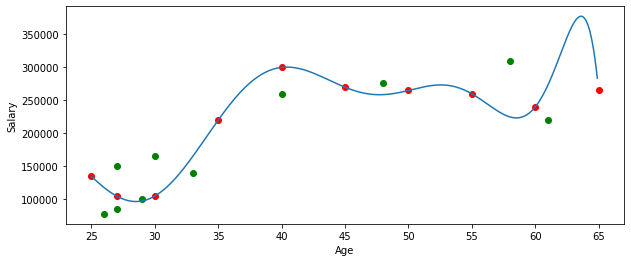

c:\users\lei00068\appdata\local\programs\python\python38\lib\site-packages\IPython\core\interactiveshell.py:3361: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


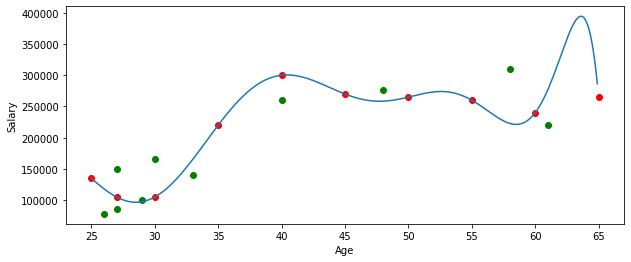

c:\users\lei00068\appdata\local\programs\python\python38\lib\site-packages\IPython\core\interactiveshell.py:3361: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


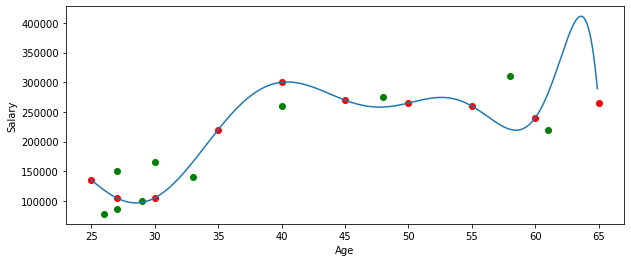

In [20]:
import numpy as np
from sklearn.metrics import mean_squared_error

x1 = df1_train['Age']
y1 = df1_train['Salary']

x2 = df2_test['Age']
y2 = df2_test['Salary']

rmse_test = []
rmse_train = []

for deg in np.arange(2,15,1):
    weights = np.polyfit(x1, y1, deg)
    model   = np.poly1d(weights)
    xx1 = np.arange(x1.min(), x1.max(), 0.1)
    plt.plot(xx1, model(xx1))
    plt.xlabel("Age")
    plt.ylabel("Salary")
    plt.scatter(x1,y1, color='red', label = "train")
    plt.scatter(x2,y2, color='green', label = "test")
    plt.show()
    
    y1  = np.array(y1)
    yy1 = np.array(model(x1))
    rmse = mean_squared_error(y1,yy1)
    rmse_train.append(rmse)
    
    y2 = np.array(y2)
    yy2 = np.array(model(x2))
    rmse = mean_squared_error(y2,yy2)
    rmse_test.append(rmse)

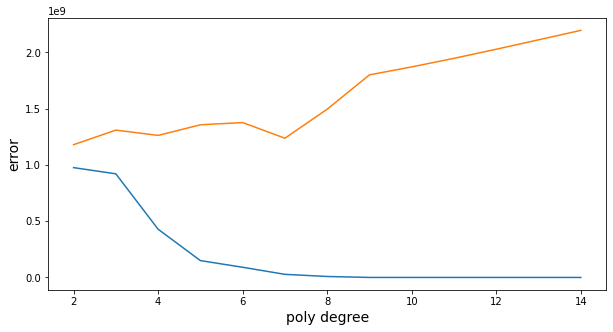

In [23]:
fig , ax = plt.subplots(1,1, figsize=(10,5))
ax.plot(np.arange(2,15,1),  rmse_train, label = "train error")
ax.plot(np.arange(2,15,1),  rmse_test, label = "validation error")
ax.set_xlabel("poly degree", fontsize=14)
ax.set_ylabel("error", fontsize=14)
plt.show()

For degree > 8 the model overfit the data. Best fit is for degree 6 or 7!! 

## Understanding the scikit-learn estimator API

Scikit-learn is the most popular machine learning package in the data science community. Written in Python programming language, scikit-learn provides quite effective and easy to use tools for data processing to implementing machine learning models. Besides its huge adoption in the machine learning word, it continues to inspire packages like Keras and others with its now industry standard APIs. 

### Installing scikit-learn

After you’ve completed the python installations, you can install scikit-learn by running the following command from your terminal (or command prompt):

    pip install -U scikit-learn

If you want to use conda as your package manager, then you can install it as:

    conda install scikit-learn

Alternatively, you can install the scikit-learn package directly from your Jupiter Notebook by putting an exclamation mark (!) in front of the commands above. That is like:

    !pip install -U scikit-learn

### Simplicity of the Scikit-learn API design:

The single most important reason why scikit-learn is the most popular machine learning package out there is its simplicity. No matter you’re using a linear regression, random forest or support vector machine; you’re always calling the same functions and methods. Moreover, you can build end-to-end machine learning pipelines with a couple of codes. 

Here, we’d like to talk about a couple of apis such that you can do many of the machine learning tasks by using these. We’re talking about three basic interfaces: **estimator**, **predictor** and **transformer**.

#### Estimator

The **estimator** interface represents a machine learning model that needs to be trained on a set of data. Training a model is a central issue in any machine learning pipeline and hence we need to use this a lot. **In scikit-learn, any model can be trained easily with the fit() method of the estimator interface**. Yes, all the models regardless of regression or classification problem; supervised or unsupervised task. This is where scikit-learn’s design shines in.

#### Predictor

Similar to the estimator interface, there’s another one which is called the **predictor** interface. It expands the concept of an estimator by adding a **predict()** method and it represents a trained model. Once we have a trained model, most often than not we want to get predictions out of it and here it suffices to use the predict() method! The graph below demonstrates a machine learning pipeline where fit and predict methods come into play. Note that, instead of calling fit() and predict() separately, one can also use fit_predict() method which first train a model and then get the predictions.

![caption](./pic/chapter-2-2_pic_21.png)

### Transformer

The next interface we want to bring to your attention is the **transformer** interface. A crucial work when working with data is to transform the variables. Whether it refers to scaling a variable or vectorizing a sentence, the transformer interface enables us to do all the transformations by calling the transform() method. Usually, we use this method after the fit() method. This is because operations that are used to transform variables are also treated as estimators. Hence, calling fit() method returns an estimator trained on a data and applying transform() on a data using this estimator transforms the data. Instead of calling fit and transform methods separately, one can also use the fit_transform() method as a short-cut. The combined fit_transform method usually works more efficiently with respect to the computation time. The figure below illustrates the usage of transform in a machine learning pipeline setting:

![caption](./pic/chapter-2-2_pic_22.png)